<a href="https://colab.research.google.com/github/Zyuuu-G/Quantum_code/blob/main/Quantum_hw_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Quantum hw 5

Ziyu Gao

2/21/2023

In [ ]:
# shooting method


### Schroeder 2.11 

def IntegrateTISE(x,V,E,psi0=0,psi1=1e-6):  ### *** why is psi1 1e-6 ? *** how do I KNOW if it's small enough
    # setup everything
    psi = np.zeros_like(x)
    psi[0] = psi0
    psi[1] = psi1
    dx = x[1]-x[0]
    N = len(x)
    
    #calculate things 
    for i in range(2,N):
        thisPsi = psi[i-1]
        lastPsi = psi[i-2]
        psi[i] = 2*thisPsi*(1-dx**2 *(E-V[i])) - lastPsi
        
    return psi

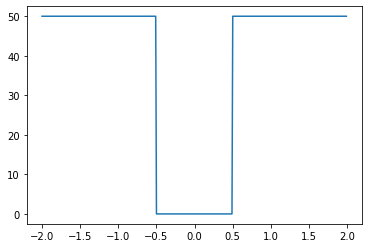

In [ ]:
xmin = -2
xmax = 2
dx = .01
a=1

x = np.arange(xmin,xmax,dx)
V = np.piecewise(x, [x < -a/2, ((-a/2<= x) & (x <= a/2)), x>a/2], [50, 0, 50])

plt.plot(x,V)

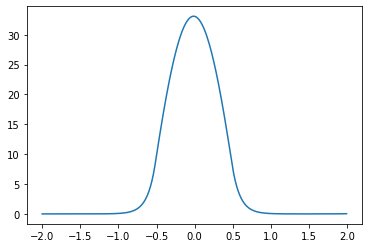

In [ ]:
psi = IntegrateTISE(x,V,3.41204667)
plt.plot(x,psi)

In [ ]:
print('for 4 decimal places, the percentage difference is',(3.41204667-3.4120)/3.41204667)

for 4 decimal places, the percentage difference is 1.3678007516860088e-05


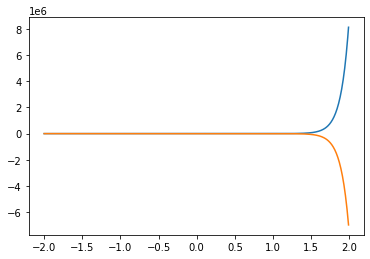

high and mid match 3.25
low and mid match 3.375
low and mid match 3.4375
high and mid match 3.40625
low and mid match 3.421875
high and mid match 3.4140625
high and mid match 3.41015625
low and mid match 3.412109375
high and mid match 3.4111328125
low and mid match 3.41162109375
low and mid match 3.411865234375
low and mid match 3.4119873046875
low and mid match 3.41204833984375


In [ ]:

E_low = 3
E_high = 4

psi_low = IntegrateTISE(x,V,E_low)
psi_high = IntegrateTISE(x,V,E_high)
plt.plot(x,psi_low,x,psi_high)
plt.show()

E_mid = (E_high+E_low)/2
psi_mid = IntegrateTISE(x,V,E_mid)

while abs(psi_mid[-1])>100:
    if np.sign(psi_mid[-1])==np.sign(psi_low[-1]):
        # mid guess and low guess match so new energy is between mid and high 
        E_low = E_mid
        psi_low = psi_mid
        E_mid = (E_high+E_low)/2
        psi_mid = IntegrateTISE(x,V,E_mid)
        print('low and mid match',E_mid)
    else:
        # mid guess and high guess match so new energy is between low and mid
        E_high = E_mid
        psi_high = psi_mid
        E_mid = (E_high+E_low)/2
        psi_mid = IntegrateTISE(x,V,E_mid)
        print('high and mid match',E_mid)
            

In [ ]:
print('using the auto search code, the results is different compare to the "eyeball guessing" result') 
print('the percentage difference is',(E_mid-3.41204667)/E_mid)

print('\nI tried to change the potential boundary (back and force) form including to excluding "x=a" as zero potential, did not observe noticable change.')

using the auto search code, the results is different compare to the "eyeball guessing" result
the percentage difference is 4.89396275674451e-07

I tried to change the potential boundary (back and force) form including to excluding "x=a" as zero potential, did not observe noticable change.


In [ ]:
V_oo = np.piecewise(x, [x < -a/2, ((-a/2<= x) & (x <= a/2)), x>a/2], [1e4,0,1e4])#[np.Infinity-5, 0, np.Infinity-5])

#plt.plot(x,V_oo)

(-1e+80, 1e+81)

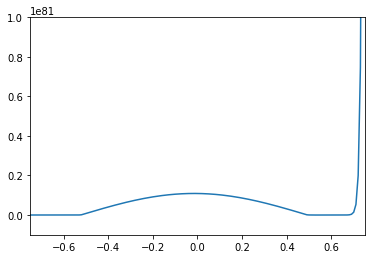

In [ ]:
psioo = IntegrateTISE(x,V_oo,4.76781765060)
plt.plot(x,psioo)
plt.xlim(-.75,.75)
plt.ylim(-1e80,1e81)
''' well, I can't make it better'''

(-1e+80, 1e+81)

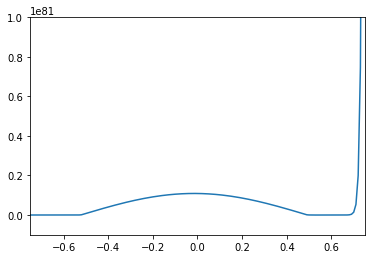

In [ ]:
# change the boundary, see what happens to E corresponding the well
V_oo1 = np.piecewise(x, [x <= -a/2, ((-a/2< x) & (x < a/2)), x>=a/2], [1e4,0,1e4])#[np.Infinity-5, 0, np.Infinity-5])

psioo = IntegrateTISE(x,V_oo,4.76781765060)
plt.plot(x,psioo)
plt.xlim(-.75,.75)
plt.ylim(-1e80,1e81)

''' Well, I can't find the diffence '''

In [ ]:
### Schroeder 2.12 

xmin = -5
xmax = 6
dx = .001
a=1

x5 = np.arange(xmin,xmax,dx)
V5 = np.piecewise(x, [x < -a/2, ((-a/2<= x) & (x <= a/2)), x>a/2], [5, 0, 5])
#plt.plot(x,V)


" \nFrom the result(1.75...) we can see the next energy level will have energy 4*1.75= ~ 7 unit, which exceed V=5 thus no longer traped.\nBut, this number wil be smaller than 7 by some factor because it's not a infinate potential well.\nI'll test it with shooting method to see if there exist one solution for E2.\n"

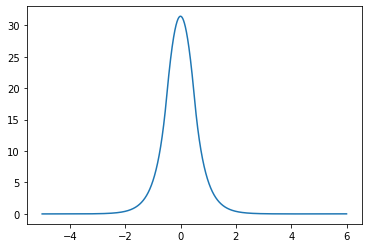

In [ ]:
psi5 = IntegrateTISE(x5,V5,1.754886896)
plt.plot(x5,psi5)
''' 
From the result(1.75...) we can see the next energy level will have energy 4*1.75= ~ 7 unit, which exceed V=5 thus no longer traped.
But, this number wil be smaller than 7 by some factor because it's not a infinate potential well.
I'll test it with shooting method to see if there exist one solution for E2.
'''

In [ ]:
#psi5 = IntegrateTISE(x5,V5,5.7)
#plt.plot(x5,psi5)
'''doesn't seem like it have an avalible second energy state'''

"doesn't seem like it have an avalible second energy state"

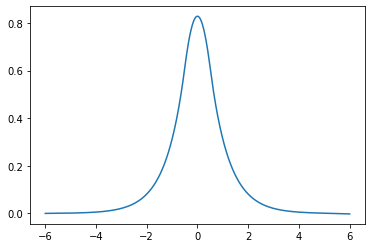

In [ ]:
x20 = np.arange(-6,6,0.001)
V20 = np.piecewise(x20, [x20 < -a/2, ((-a/2 <= x20) & (x20 <= a/2)), x20 > a/2], [2, 0, 2])

psi20 = IntegrateTISE(x20,V20,1.092495)
plt.plot(x20,psi20)

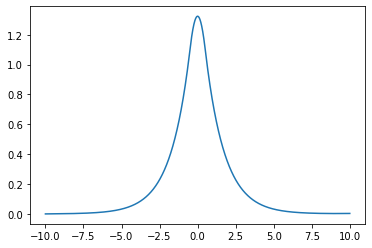

In [ ]:
x10 = np.arange(-10,10,0.001)
V10 = np.piecewise(x10, [x10 < -a/2, ((-a/2 <= x10) & (x10 <= a/2)), x10 > a/2], [1, 0, 1])

psi10 = IntegrateTISE(x10,V10,0.692078)
plt.plot(x10,psi10)

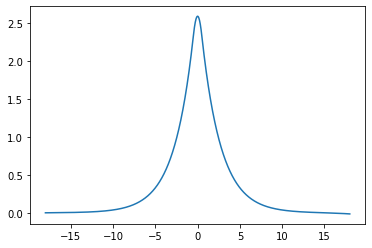

In [ ]:
x05 = np.arange(-18,18,0.001)
V05 = np.piecewise(x05, [x05 < -a/2, ((-a/2 <= x05) & (x05 <= a/2)), x05 > a/2], [.5, 0, .5])

psi05 = IntegrateTISE(x05,V05,0.405331)
plt.plot(x05,psi05)

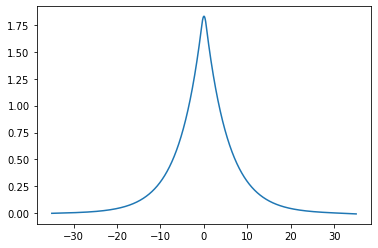

In [ ]:
x02 = np.arange(-35,35,0.001)
V02 = np.piecewise(x02, [x02 < -a/2, ((-a/2 <= x02) & (x02 <= a/2)), x02 > a/2], [.2, 0, .2])

psi02 = IntegrateTISE(x02,V02,0.182316)
plt.plot(x02,psi02)

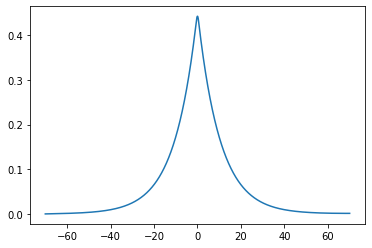

In [ ]:
x01 = np.arange(-70,70,0.01)
V01 = np.piecewise(x01, [x01 < -a/2, ((-a/2 <= x01) & (x01 <= a/2)), x01 > a/2], [.1, 0, .1])

psi01 = IntegrateTISE(x01,V01,0.0953097)
plt.plot(x01,psi01)

In [ ]:
'''
As the potential well shallows (V--), the bound state energy decreases while the wave function is more spreaded out (long the a x-axis here).
The amount of position wavefunction spreaded outside of the potential well region is (somehow negatively) proportional to the potential.
'''

'\nAs the potential well shallows (V--), the bound state energy decreases while the wave function is more spreaded out (long the a x-axis here).\nThe amount of position wavefunction spreaded outside of the potential well region is (somehow negatively) proportional to the potential.\n'

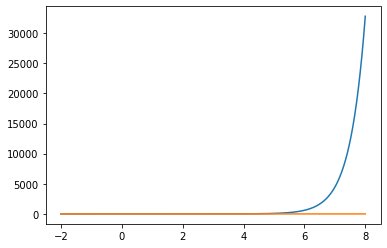

In [ ]:
E_low = 0
E_high = 2

psi_low = IntegrateTISE(x20,V20,E_low)
psi_high = IntegrateTISE(x20,V20,E_high)
plt.plot(x20,psi_low,x20,psi_high)
plt.show()

E_mid = (E_high+E_low)/2
psi_mid = IntegrateTISE(x20,V20,E_mid)

while abs(psi_mid[-1])>100:
    if np.sign(psi_mid[-1])==np.sign(psi_low[-1]):
        # mid guess and low guess match so new energy is between mid and high 
        E_low = E_mid
        psi_low = psi_mid
        E_mid = (E_high+E_low)/2
        psi_mid = IntegrateTISE(x20,V20,E_mid)
        print('low and mid match',E_mid)
    else:
        # mid guess and high guess match so new energy is between low and mid
        E_high = E_mid
        psi_high = psi_mid
        E_mid = (E_high+E_low)/2
        psi_mid = IntegrateTISE(x20,V20,E_mid)
        print('high and mid match',E_mid)

In [ ]:
### Schroeder 2.13

# a) 
'''
for a classical particle(initially moving right), the motion will be linearly slowing dowm to the right (due to pis=a*x), 
turn around and speed up to the left; as it hits the boundary on the left at x=0, it bounces back (discontinuous?) moving to the right with the same speed

maybe the name "quantum bouncer" came from this similar behavior of the wave functions amplitude
'''

# b)
